### Importa bibliotecas para manipulação de dados e construção de modelo de árvore de decisão

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Carregar o conjunto de dados
pima = pd.read_csv("../raw-data/CSV/diabetes.csv")

# Exibir as primeiras linhas do DataFrame
print(pima.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
# Separar características (X) e rótulo (y)
x = pima.drop("Outcome", axis=1)  # Remover a coluna "Outcome" para obter as características
y = pima["Outcome"]  # A coluna "Outcome" é o rótulo

# Exibir as formas dos DataFrames
print(x.shape)  # Dimensões de X
print(y.shape)  # Dimensões de y

(768, 8)
(768,)


In [4]:
# Divide o conjunto de dados em treino (70%) e teste (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Exibe as formas dos conjuntos de treino e teste
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


Cria o objeto do classificador de árvore de decisão

In [5]:
clf = DecisionTreeClassifier()

Treina o classificador de árvore de decisão

In [6]:
clf = clf.fit(x_train, y_train)

Prediz a resposta para o conjunto de dados de teste

In [7]:
y_pred = clf.predict(x_test)

Imprime a acurácia do modelo, mostrando a porcentagem de previsões corretas

In [8]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6796536796536796


Criando e manipulando gráficos em formato DOT

In [9]:
import pydot

Definindo para conter os nomes das características (ou variáveis independentes) do conjunto de dados. A linha de código a seguir extrai todos os nomes das colunas, exceto a última coluna, que é o rótulo (neste caso, "Outcome")

In [10]:
feature_cols = pima.columns[:-1].tolist()

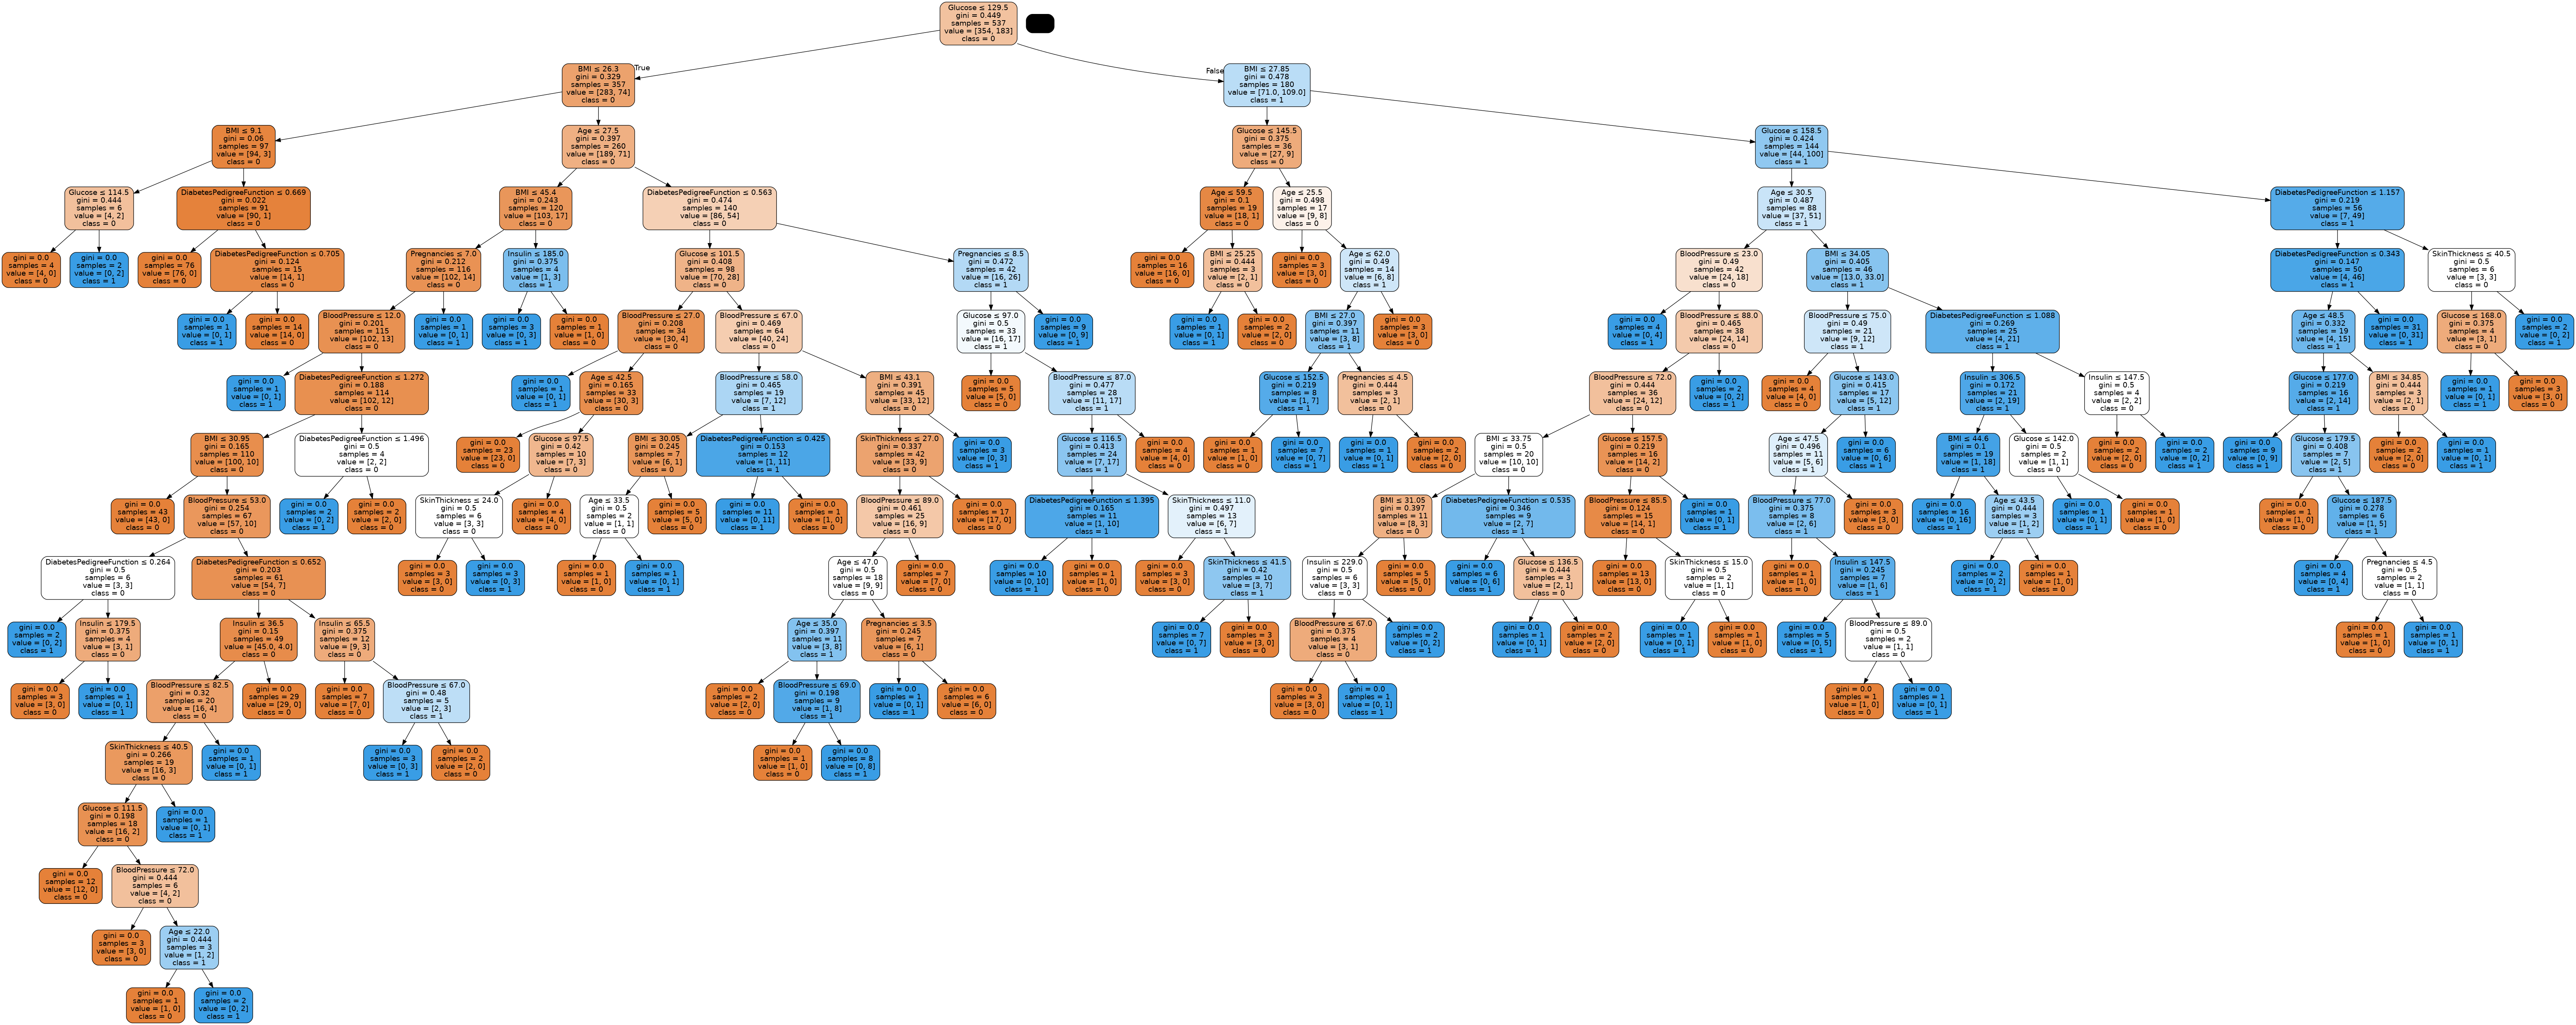

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

# Carregar o conjunto de dados
pima = pd.read_csv("../raw-data/CSV/diabetes.csv")

# Separar características (X) e rótulo (y)
X = pima.drop("Outcome", axis=1)  # Características
y = pima["Outcome"]  # Rótulo

# Definir os nomes das características
feature_cols = X.columns.tolist()  # Lista de nomes das colunas

# Dividir o conjunto de dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Criar e treinar o classificador
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

# Criar um buffer para a saída do gráfico
dot_data = StringIO()

# Exportar a árvore de decisão para o formato DOT
export_graphviz(
    clf, 
    out_file=dot_data,
    filled=True, 
    rounded=True,
    special_characters=True,
    feature_names=feature_cols,
    class_names=['0', '1']
)

# Criar o gráfico a partir dos dados DOT
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Salvar o gráfico como PNG
graph.write_png("../imagens-processadas/diabetes.png")

# Exibir a imagem
Image(graph.create_png())